In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sif_parser
from scipy.signal import find_peaks

from ipywidgets import widgets, interactive

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = [4, 3]

In [5]:
file_dir = '/mnt/e/東大/研究/20240429_spectrometer_calibration/240430/'
file = glob.glob(file_dir+'*sif')

# Load the data

In [6]:
df = pd.read_csv('./nist lines.csv')
df.set_index(['element', 'No.'], inplace=True)

data, info = sif_parser.np_open(file[0])
data = data.squeeze()

In [7]:
useful_cols = ['obs_wl_air(nm)', 'intens', 'Acc', 'Aki(s^-1)']
idx = np.logical_and.reduce((df['obs_wl_air(nm)']>700, df['obs_wl_air(nm)']<705, df.intens_f>400))
df[idx][useful_cols].loc['Neon']

,obs_wl_air(nm),intens,Acc,Aki(s^-1)
No.,,,,
646,702.40500,34000,B+,1890000.0
647,703.24128,85000,B+,26600000.0


# Beginning to calculate

In [8]:
%matplotlib widget

In [9]:
# prepare the dataframe to write the data
df = pd.DataFrame()

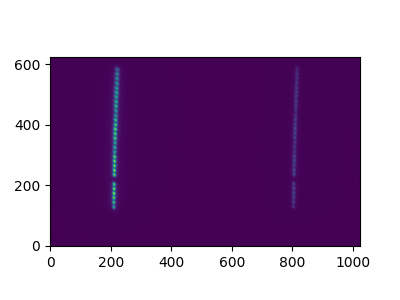

In [10]:
data, info = sif_parser.np_open(file[50])
data = data.squeeze()

fig, ax = plt.subplots()
im = ax.imshow(data[400:, :], origin='lower')
# im.set_clim(vmax=25546.059)

In [11]:
bins = np.sum(data[400:, :800], axis=0)
peaks, _ = find_peaks(bins, distance=10, height=1.7e7)

In [12]:
peaks

array([213])

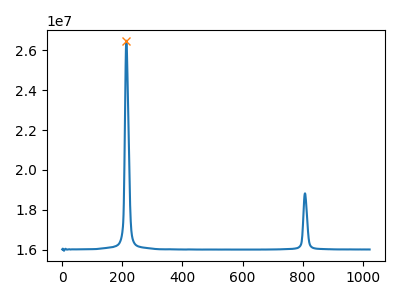

In [13]:
plt.figure()
plt.plot(np.sum(data[400:, :], axis=0))
plt.plot(peaks, bins[peaks], 'x')
plt.tight_layout()

In [62]:
(597.55343-594.4834)/(928-54)

0.0035126201372998717

In [17]:
'resonable' in ['unresonable', 's']

False

In [34]:
629.5+2.4 + 0.0033*(400)

633.22

In [75]:
(427.02252-426.97223)/(357-351)

0.008381666666660218

In [20]:
0.003766353 * 1024

3.856745472

In [43]:
591.3633 - (576-371) * 0.003539

590.637805

In [43]:
-(359.35263-360.01694)/(540-370)

0.0038417058823527256

In [44]:
-(359.35263-360.01694)/(540-370)

0.003907705882352943

In [56]:
(368.57351-368.22421)/(359-269)

0.00388111111111079

In [54]:
1024 * 0.0039

3.9936

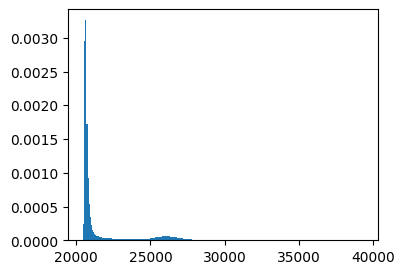

In [60]:
_, x, bins = plt.hist(data[400:, :].ravel(), bins=256, density=True)

In [86]:
x, bins = np.histogram(data[400:, :].ravel(), bins=256)

In [98]:
np.abs((np.cumsum(x)/data[400:, :].size - 0.90)).argmin()

69

In [99]:
((bins[:-1] + bins[1:])/2)[69]

25546.059

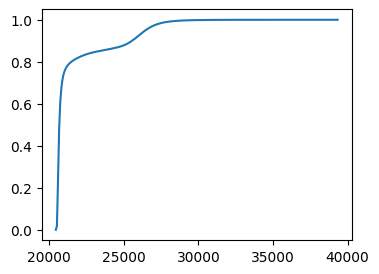

In [87]:
plt.plot((bins[:-1] + bins[1:])/2, np.cumsum(x)/data[400:, :].size)

In [75]:
data[400:, :].size

638976

In [354]:
bins = np.sum(data[400:, :], axis=0)
peaks, _ = find_peaks(bins, threshold=0.3e4)

In [355]:
peaks

array([171, 797])

In [356]:
%matplotlib inline

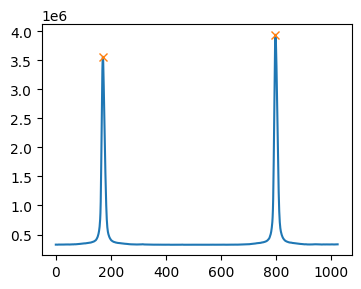

In [357]:
plt.plot(np.sum(data[400:, :], axis=0))
plt.plot(peaks, bins[peaks], 'x')

In [358]:
(606.45359-604.61348)/(797-171)

0.0029394728434504495

In [326]:
df2.loc['dial702.2'] = [702.40500, 703.24128, peaks[0], peaks[1],
                       (703.24128-702.40500)/(peaks[1]-peaks[0])]

In [327]:
df2

,wl1(nm),wl2(nm),px1,px2,linear_dispersion
dial360,360.01694,360.91787,210.0,480.0,0.005331
dial502.8,503.13484,503.77512,353.0,524.0,0.003744
dial503.7,503.13484,503.77512,108.0,279.0,0.003744
dial606.5,604.61348,606.45359,171.0,797.0,0.002939
dial663.5,702.40500,703.24128,361.0,609.0,0.003372
dial702.2,702.40500,703.24128,361.0,609.0,0.003372


In [2]:
(360.91787-360.01694)/(480-210)

0.0033367777777778395

In [344]:
df2.loc['dial663.5'] = [660.29007, 665.20925, peaks[1], peaks[2],
                      (665.20925-660.29007)/(peaks[2]- peaks[1])]

In [346]:
df2

,wl1(nm),wl2(nm),px1,px2,linear_dispersion
dial360,360.01694,360.91787,210.0,480.0,0.005331
dial502.8,503.13484,503.77512,353.0,524.0,0.003744
dial503.7,503.13484,503.77512,108.0,279.0,0.003744
dial606.5,604.61348,606.45359,171.0,797.0,0.002939
dial663.5,660.29007,665.20925,182.0,978.0,0.006180
dial702.2,702.40500,703.24128,361.0,609.0,0.003372


In [350]:
df2.to_csv('./first calibration.csv')

In [1]:
(703.24128 + 702.40500)/2

702.82314

In [348]:
(606.45359-604.61348)/(797.0-171.0)

0.0029394728434504495

In [349]:
(607.43376 - 602.99968)/(797.0-171.0)

0.007083194888178905

In [282]:
df2.loc['dial606.5'] = [604.61348, 606.45359, peaks[0], peaks[1], 
                        (606.45359 - 604.61348)/(peaks[1] - peaks[0])]

In [283]:
df2

,wl1(nm),wl2(nm),px1,px2,linear_dispersion
dial360,360.01694,360.91787,210.0,480.0,0.005331
dial502.8,503.13484,503.77512,353.0,524.0,0.003744
dial503.7,503.13484,503.77512,108.0,279.0,0.003744
dial606.5,604.61348,606.45359,171.0,797.0,0.002939


In [246]:
df2.loc['dial503.7'] = [503.13484, 503.77512, peaks[1], peaks[3], 
                        (503.77512 - 503.13484)/(peaks[3] - peaks[1])]

In [264]:
df2.loc['dial502.8'] = [503.13484, 503.77512, peaks[0], peaks[1], 
                        (503.77512 - 503.13484)/(peaks[1] - peaks[0])]

In [265]:
df2

,wl1(nm),wl2(nm),px1,px2,linear_dispersion
dial360,360.01694,360.91787,210.0,480.0,0.005331
dial502.8,503.13484,503.77512,353.0,524.0,0.003744
dial503.7,503.13484,503.77512,108.0,279.0,0.003744


In [209]:
df3 = pd.DataFrame(columns=['wl1(nm)', 'wl2(nm)', 'wl3(nm)', 'px1', 'px2', 'px3'])
df3.loc['dial453.3'] = [453.63003, 453.76768, 453.83026, peaks[1], peaks[2], peaks[3]]

In [210]:
df3['linear_dispersion1'] = (df3['wl2(nm)'] - df3['wl1(nm)']) / (df3.px2-df3.px1)

In [211]:
df3['linear_dispersion2'] = (df3['wl3(nm)'] - df3['wl2(nm)']) / (df3.px3-df3.px2)

In [212]:
df3

,wl1(nm),wl2(nm),wl3(nm),px1,px2,px3,linear_dispersion1,linear_dispersion2
dial453.3,453.63003,453.76768,453.83026,480.0,517.0,586.0,0.00372,0.000907


In [183]:
df2 = pd.DataFrame(columns=['wl1(nm)', 'wl2(nm)', 'px1', 'px2'])
df2.loc['dial360'] = [360.01694, 360.91787, peaks[0], peaks[1]]

In [184]:
df2['linear_dispersion'] = (df['wl2(nm)'] - df['wl1(nm)']) / (df.px2-df.px1)

In [185]:
df2

,wl1(nm),wl2(nm),px1,px2,linear_dispersion
dial360,360.01694,360.91787,210.0,480.0,0.005331
